# Gurgaon Real Estate Market Analysis

## Objective
The objective of this analysis is to perform Exploratory Data Analysis (EDA) on Gurgaon residential real estate data to understand pricing patterns, locality-wise trends, and the impact of property features such as area, BHK configuration, property type, and RERA approval.

## Importing Required Libraries
In this step, we import the necessary Python libraries for data manipulation and visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Overview
Description of dataset, columns, and source.

In [16]:
df = pd.read_csv("data.csv")
df.head()

,Price,Status,Area,Rate per sqft,Property Type,Locality,Builder Name,RERA Approval,BHK_Count,Socity,Company Name,Flat Type
0,10700000.0,Under Construction,1138,"9,450",2 BHK Apartment in M3M Antalya Hills Phase I,Sector 79,home,Approved by RERA,2.0,M3M Antalya Hills Phase I,M3M,Apartment
1,14400000.0,Under Construction,1528,"9,450",3 BHK Apartment in M3M Antalya Hills Phase I,Sector 79,Property In Gurgaon,Approved by RERA,3.0,M3M Antalya Hills Phase I,M3M,Apartment
2,10700000.0,Under Construction,1138,"9,450",2 BHK Apartment in M3M Antalya Hills Phase I,Sector 79,properties for sale in Gurgaon,Approved by RERA,2.0,M3M Antalya Hills Phase I,M3M,Apartment
3,40000000.0,Ready to move,4500,"8,888",4 BHK Independent Floor,Sector 57,MM India Pvt Ltd,Not approved by RERA,4.0,Outside Socity,Outside,Plot
4,24000000.0,Under Construction,1800,"13,333",3 BHK Independent Floor in Anant Raj Estate Plots,Sector 63,MM India Pvt Ltd,Approved by RERA,3.0,Anant Raj Estate Plots,Anant,Floor


## Data Cleaning
Handling missing values, duplicates, and data type conversions.


In [17]:
#Data Cleaning
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df = df.drop_duplicates()
print(df.columns)

#Numerical Columns Cleaning
df["price"] = df["price"].astype(str).str.replace(",", "").astype(float).astype(int)
df["area"] = df["area"].astype(str).str.replace(",", "").astype(int)
df["rate_per_sqft"] = df["rate_per_sqft"].astype(str).str.replace(",", "").astype(int)

#Categorical Columns Cleaning
df['status'] = df['status'].str.strip().str.lower()
df['rera_approval'] = df['rera_approval'].str.strip().str.lower().map({'approve by rera': True, 'not approve by rera': False})
df["flat_type"] = df["flat_type"].str.strip().str.lower()


# print(df)
print(df.info())

Index(['price', 'status', 'area', 'rate_per_sqft', 'property_type', 'locality',
       'builder_name', 'rera_approval', 'bhk_count', 'socity', 'company_name',
       'flat_type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 14223 entries, 0 to 19514
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14223 non-null  int64  
 1   status         14223 non-null  object 
 2   area           14223 non-null  int64  
 3   rate_per_sqft  14223 non-null  int64  
 4   property_type  14223 non-null  object 
 5   locality       14223 non-null  object 
 6   builder_name   14223 non-null  object 
 7   rera_approval  0 non-null      object 
 8   bhk_count      14223 non-null  float64
 9   socity         14223 non-null  object 
 10  company_name   14223 non-null  object 
 11  flat_type      14223 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.4+ MB
None


## Business Questions & Insights
Answers to key real estate pricing questions.


### Question 1: Which is the costliest flat?
This analysis identifies the highest-priced property in the dataset.

In [18]:
costliest_flat = df.loc[df['price'].idxmax()]
print(f"The costliest flat is a {costliest_flat['bhk_count']} BHK {costliest_flat['flat_type']} located in {costliest_flat['locality']} with a price of {costliest_flat['price']/10000000} crores in {costliest_flat['socity']} society.")

The costliest flat is a 6.0 BHK apartment located in Sector 42 with a price of 122.63 crores in  DLF Camellias society.


### Question 2: Which locality has the highest average price?
Grouping properties by locality helps compare average prices across different areas.

In [19]:
avg_price_locality = df.groupby('locality')['price'].mean().idxmax()
print(f"The locality with the highest average price is {avg_price_locality}.") 

The locality with the highest average price is Baliawas.


### Question 3: Which locality has the highest rate per square foot?
Rate per square foot highlights premium locations independent of property size.

In [20]:
avg_rate_locality = df.groupby('locality')['rate_per_sqft'].mean().idxmax()
print(f"The locality with the highest average rate per sqft is {avg_rate_locality}.")

The locality with the highest average rate per sqft is Sector 42.


### Question 4: Do ready to move property cost more than under construction property?
Median prices are compared to reduce the impact of outliers.

In [21]:
ready_to_move_avg_price = df[df['status'] == 'ready to move']['price'].median()
under_construction_avg_price = df[df['status'] == 'under construction']['price'].median()
if ready_to_move_avg_price > under_construction_avg_price:
    print("Ready to move properties cost more than under construction properties.")
else:    
    print("Under construction properties cost more than ready to move properties.")

Under construction properties cost more than ready to move properties.


### Question 5: Do rera approve properties command the price premium?
This analysis evaluates whether RERA-approved properties command a price premium.

In [22]:
rera_approved_avg_price = df[df['rera_approval'] == True]['price'].median()
not_rera_approved_avg_price = df[df['rera_approval'] == False]['price'].median()
if rera_approved_avg_price > not_rera_approved_avg_price:
    print("RERA approved properties command a price premium.")
else:
    print("RERA approved properties do not command a price premium.") 

RERA approved properties do not command a price premium.


### How does area impact the price?
A scatter plot is used to visualize how property area influences pricing.


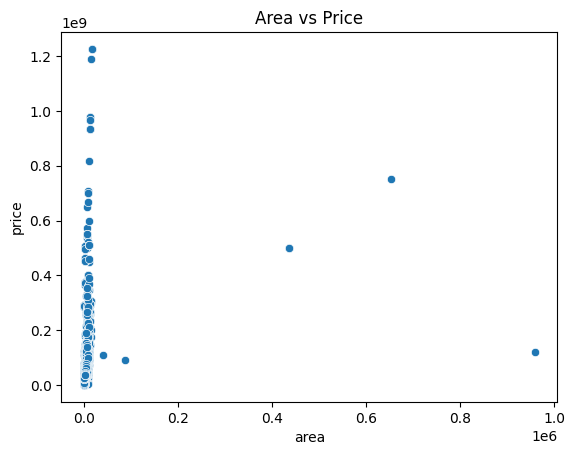

In [23]:
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Price')
plt.show() 

### Question 7: Which BHK Configuration is most expensive on per sqft basis?
This analysis identifies which BHK configuration is most expensive on a per square foot basis.

In [24]:
avg_rate_bhk = df.groupby('bhk_count')['rate_per_sqft'].mean().idxmax()
print(f"The BHK configuration with the highest average rate per sqft is {avg_rate_bhk} BHK.")

The BHK configuration with the highest average rate per sqft is 114.0 BHK.


### Question 8: Which property type is costliest?
Average rate per square foot is compared across different property types to identify the costliest one.

In [25]:
avg_price_property_type = df.groupby('flat_type')['rate_per_sqft'].mean().idxmax()
print(f"The costliest property type is {avg_price_property_type}.")

The costliest property type is villa.


### Question 9: Do certain builders price higher?
This analysis highlights builders who consistently price higher based on average rate per square foot.

In [26]:
top_5_builders = df.groupby('company_name')['rate_per_sqft'].mean().sort_values(ascending=False).head(5)
print("The top 5 builders that price higher are:", ", ".join(top_5_builders.index))

The top 5 builders that price higher are: Camelliaass, Cameliaas, Tulip, Prom, Magnoliaass


### Question 10: Are larger homes more expensive on a per sqft basis?
This plot helps understand whether larger homes are more expensive per square foot.

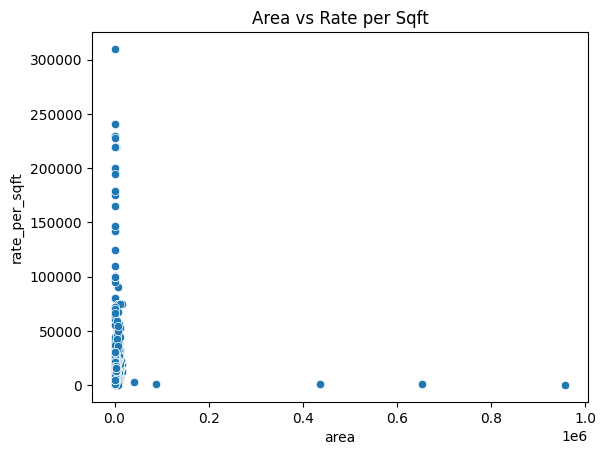

In [27]:
sns.scatterplot(x='area', y='rate_per_sqft', data=df)
plt.title('Area vs Rate per Sqft') 
plt.show()

## Conclusion

From the exploratory data analysis of Gurgaon’s residential real estate market, several important insights emerge:

- Property prices generally increase with area; however, the relationship is **not linear**. The scatter plot shows that while larger homes tend to have higher total prices, many high-priced properties also exist at relatively smaller areas, indicating the influence of **location, builder brand, and luxury positioning**.

- The analysis of **area vs rate per square foot** reveals an inverse trend in many cases. Larger homes do **not necessarily command higher rates per sqft**, suggesting economies of scale where premium pricing is driven more by locality and project quality than sheer size.

- **Sector 42** stands out as the most premium locality, having both the highest rate per square foot and hosting the costliest flat in the dataset (DLF Camellias). This confirms the strong role of micro-location in real estate pricing.

- Although **Baliawas** has the highest average property price, it does not lead in rate per square foot, highlighting that large plot sizes can drive high total prices without necessarily reflecting higher unit pricing.

- Interestingly, **under-construction properties are priced higher than ready-to-move properties**, which may reflect investor expectations of future appreciation, premium upcoming developments, or early-stage luxury projects.

- **RERA approval does not show a clear price premium** in this dataset, suggesting that buyers may already consider regulatory compliance as a baseline requirement rather than a differentiating factor.

- The appearance of a **114 BHK configuration** as the most expensive per square foot indicates a **data anomaly or outlier**, emphasizing the importance of data validation and cleaning in real-world datasets.

- Among property types, **villas are the most expensive**, reflecting exclusivity, larger land ownership, and luxury positioning.

- Builder analysis shows that pricing is significantly influenced by **brand reputation**, with a few builders consistently commanding higher rates per square foot.

Overall, this analysis demonstrates that Gurgaon’s real estate pricing is driven by a combination of **location, builder reputation, project type, and future expectations**, rather than area alone. Proper data cleaning and contextual interpretation are essential for drawing meaningful insights from real estate datasets.
